# INTRODUCTION

Regression analysis is a statistical technique that is used to predict a continuous variable from one or more independent variables. The dependent variable is the variable that is being predicted, and the independent variables are the variables that are used to predict the dependent variable.

In this machine learning regression project, the goal is to develop a model that can accurately predict the value of the dependent variable based on the values of the independent variables. The model is developed by training the algorithm on a dataset of historical data. The algorithm learns from the data and identifies patterns that can be used to predict the value of the dependent variable.

Once the model is trained, it can be used to predict the value of the dependent variable for new data points. This can be used to make decisions about future outcomes, such as predicting sales, forecasting demand, or assessing risk.

# BUSINESS UNDERSTANDING

This is a time series forecasting problem. In this project, we'll predict store sales on data from **Corporation Favorita**, a large Ecuadorian-based grocery retailer.

Specifically, we are to build a model that more accurately predicts the unit sales for thousands of items sold at different Favorita stores.

The training data includes dates, store, and product information, whether that item was being promoted, as well as the sales numbers. Additional files include supplementary information that may be useful in building your models

# IMPORTATION

In [35]:
# Import necessary libraries

# Connect to server
import pyodbc
from dotenv import dotenv_values

# Datetime
from datetime import datetime

# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
import missingno as msno

# Statistical Analysis
import scipy.stats as stats

import warnings

# ignore warnings
warnings.filterwarnings('ignore')

# DATA LOADING

Create a .env file in root of the folder of the project and all the sensitive information in the .env file

In [36]:
# # Load environment variables from a .env file
# env_variables = dotenv_values('../.env')

# server= env_variables.get('SERVER')
# database= env_variables.get('DATABASE')
# username= env_variables.get('USERNAME')
# password= env_variables.get('PASSWORD')

Create a .gitignore file and type '/.env/' file we just created. This will prevent git from tracking the file.

Create a connection by accessing your connection string with your defined environment variables 

In [37]:
# # Setup connection string to connect to the remote server
# connection_string = "DRIVER={ODBC Driver 17 for SQL Server};SERVER={dap-projects-database.database.windows.net};DATABASE={dapDB};UID={dataAnalyst_LP3};PWD={B0a@3kR$2z}"
# # connection_string = pyodbc.connect(f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}')

Setup the links and queries to read the data from the various sources

In [38]:
# # Query statement to fetch oil, holidays_events and stores data from the remote server
# oil_query = 'SELECT * FROM dbo.oil'
# holidays_query = 'SELECT * FROM dbo.holidays_events'
# stores_query = 'SELECT * FROM dbo.stores'

In [39]:
# # Read all data from different sources
# oil = pd.read_sql_query(oil_query, connection_string, parse_dates=['date'])
# holidays_events = pd.read_sql_query(holidays_query, connection_string, parse_dates=['date'])
# stores = pd.read_sql_query(stores_query, connection_string)
# transactions = pd.read_csv('./data/transactions.csv', parse_dates=['date'])
# train = pd.read_csv('./data/train.csv', parse_dates=['date'])
# test = pd.read_csv('./data/test.csv', parse_dates=['date'])

In [40]:
# #Saving Dataframe to csv

# oil.to_csv('oil.csv', index=False)
# holidays_events.to_csv('holidays_events.csv', index=False)
# stores.to_csv('stores.csv', index=False)

In [42]:
# connection=pyodbc.connect(connection_string)

# # Read the data from the SQL queries into DataFrames
# oil=pd.read_sql(oil_query,connection)
# holidays_events=pd.read_sql(holidays_query,connection)
# stores=pd.read_sql(stores_query,connection)


oil  = pd.read_csv('oil.csv')          # Read the data from the CSV file into a DataFrame
holidays_events  = pd.read_csv('holidays_events.csv')          # Read the data from the CSV file into a DataFrame
stores  = pd.read_csv('stores.csv')          # Read the data from the CSV file into a DataFrame
transactions  = pd.read_csv('transactions.csv')          # Read the data from the CSV file into a DataFrame
sample_submission  = pd.read_csv('sample_submission.csv')          # Read the data from the CSV file into a DataFrame
test = pd.read_csv('test.csv')          # Read the data from the CSV file into a DataFrame
train = pd.read_csv('train.csv')          # Read the data from the CSV file into a DataFrame

# DATA UNDERSTANDING

# EXPLORATORY DATA ANALYSIS (EDA)

Use various pandas methods to get preliminary information about the various datasets

In [43]:
# View the first 5 rows of the oil dataset
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.139999
2,2013-01-03,92.970001
3,2013-01-04,93.120003
4,2013-01-07,93.199997


In [44]:
# View the last 5 rows of the oil dataset
oil.tail()

,date,dcoilwtico
1213,2017-08-25,47.650002
1214,2017-08-28,46.400002
1215,2017-08-29,46.459999
1216,2017-08-30,45.959999
1217,2017-08-31,47.259998


In [45]:
# View the first 5 rows of the holidays_events dataset
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [46]:
# View the last 5 rows of the holidays_events dataset
holidays_events.tail()

,date,type,locale,locale_name,description,transferred
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False
349,2017-12-26,Additional,National,Ecuador,Navidad+1,False


In [47]:
# View the first 5 rows of the stores dataset
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [48]:
# View the last 5 rows of the stores dataset
stores.tail()

,store_nbr,city,state,type,cluster
49,50,Ambato,Tungurahua,A,14
50,51,Guayaquil,Guayas,A,17
51,52,Manta,Manabi,A,11
52,53,Manta,Manabi,D,13
53,54,El Carmen,Manabi,C,3


In [49]:
# View the first 5 rows of the transactions dataset
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [50]:
# View the last 5 rows of the transactions dataset
transactions.tail()

,date,store_nbr,transactions
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932
83487,2017-08-15,54,802


In [51]:
# View the first 5 rows of the train dataset
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [52]:
# View the first 5 rows of the test dataset
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [53]:
# View the last 5 rows of the test dataset
test.tail()

,id,date,store_nbr,family,onpromotion
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9
28511,3029399,2017-08-31,9,SEAFOOD,0


In [54]:
# Get more information about each dataset

def get_info_df(df: pd.DataFrame):
    print('============ Shape ============')
    print(df.shape)
    print('============ Data Types ============')
    print(df.info())
    print('============ Missing Values ============')
    print(df.isnull().sum())
    print('============ Duplicated Values ============')
    print(df.duplicated().sum())
    

In [55]:
# Get more info on the oil dataset
get_info_df(oil)

============ Shape ============
(1218, 2)
============ Data Types ============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB
None
============ Missing Values ============
date           0
dcoilwtico    43
dtype: int64
============ Duplicated Values ============
0


In [56]:
# Get more info on the holidays_events dataset
get_info_df(holidays_events)

============ Shape ============
(350, 6)
============ Data Types ============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB
None
============ Missing Values ============
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64
============ Duplicated Values ============
0


In [57]:
# Get more info on the stores dataset
get_info_df(stores)

============ Shape ============
(54, 5)
============ Data Types ============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB
None
============ Missing Values ============
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64
============ Duplicated Values ============
0


In [58]:
# Get more info on the transactions dataset
get_info_df(transactions)

============ Shape ============
(83488, 3)
============ Data Types ============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB
None
============ Missing Values ============
date            0
store_nbr       0
transactions    0
dtype: int64
============ Duplicated Values ============
0


In [59]:
# Get more info on the train dataset
get_info_df(train)

============ Shape ============
(3000888, 6)
============ Data Types ============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
None
============ Missing Values ============
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64
============ Duplicated Values ============
0


In [60]:
# Get more info on the test dataset
get_info_df(test)

============ Shape ============
(28512, 5)
============ Data Types ============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB
None
============ Missing Values ============
id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64
============ Duplicated Values ============
0


In [61]:
# Define a function to check for the number of unique values in categorical columns
def check_unique_values(df: pd.DataFrame):
    """
    Check the number of unique values in the categorical columns in the DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.

    Returns:
        None
    """
    print("Checking unique values in categorical columns:")

    # Iterate through each column
    for col in df.columns:
        # Check if the column is categorical (object type) and not the 'customerID' column
        if ((df[col].dtype == 'object') or (df[col].dtype == 'bool')) and (col != 'id'):
            # Print the column name and its unique values
            print(col, '---->', df[col].unique())

In [62]:
# Call the function to check unique values for the stores dataset
check_unique_values(stores)

Checking unique values in categorical columns:
city ----> ['Quito' 'Santo Domingo' 'Cayambe' 'Latacunga' 'Riobamba' 'Ibarra'
 'Guaranda' 'Puyo' 'Ambato' 'Guayaquil' 'Salinas' 'Daule' 'Babahoyo'
 'Quevedo' 'Playas' 'Libertad' 'Cuenca' 'Loja' 'Machala' 'Esmeraldas'
 'Manta' 'El Carmen']
state ----> ['Pichincha' 'Santo Domingo de los Tsachilas' 'Cotopaxi' 'Chimborazo'
 'Imbabura' 'Bolivar' 'Pastaza' 'Tungurahua' 'Guayas' 'Santa Elena'
 'Los Rios' 'Azuay' 'Loja' 'El Oro' 'Esmeraldas' 'Manabi']
type ----> ['D' 'B' 'C' 'E' 'A']


In [63]:
# Call the function to check unique values for the holidays_events dataset
check_unique_values(holidays_events)

Checking unique values in categorical columns:
date ----> ['2012-03-02' '2012-04-01' '2012-04-12' '2012-04-14' '2012-04-21'
 '2012-05-12' '2012-06-23' '2012-06-25' '2012-07-03' '2012-07-23'
 '2012-08-05' '2012-08-10' '2012-08-15' '2012-08-24' '2012-09-28'
 '2012-10-07' '2012-10-09' '2012-10-12' '2012-11-02' '2012-11-03'
 '2012-11-06' '2012-11-07' '2012-11-10' '2012-11-11' '2012-11-12'
 '2012-12-05' '2012-12-06' '2012-12-08' '2012-12-21' '2012-12-22'
 '2012-12-23' '2012-12-24' '2012-12-25' '2012-12-26' '2012-12-31'
 '2013-01-01' '2013-01-05' '2013-01-12' '2013-02-11' '2013-02-12'
 '2013-03-02' '2013-04-01' '2013-04-12' '2013-04-14' '2013-04-21'
 '2013-04-29' '2013-05-01' '2013-05-11' '2013-05-12' '2013-05-24'
 '2013-06-23' '2013-06-25' '2013-07-03' '2013-07-23' '2013-07-24'
 '2013-07-25' '2013-08-05' '2013-08-10' '2013-08-15' '2013-08-24'
 '2013-09-28' '2013-10-07' '2013-10-09' '2013-10-11' '2013-11-02'
 '2013-11-03' '2013-11-06' '2013-11-07' '2013-11-10' '2013-11-11'
 '2013-11-12' '201

In [64]:
# Call the function to check unique values for the train dataset
check_unique_values(train)

Checking unique values in categorical columns:
date ----> ['2013-01-01' '2013-01-02' '2013-01-03' ... '2017-08-13' '2017-08-14'
 '2017-08-15']
family ----> ['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'HARDWARE' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIANCES' 'HOME CARE' 'LADIESWEAR' 'LAWN AND GARDEN' 'LINGERIE'
 'LIQUOR,WINE,BEER' 'MAGAZINES' 'MEATS' 'PERSONAL CARE' 'PET SUPPLIES'
 'PLAYERS AND ELECTRONICS' 'POULTRY' 'PREPARED FOODS' 'PRODUCE'
 'SCHOOL AND OFFICE SUPPLIES' 'SEAFOOD']


In [65]:
# Count of stores by state
stores_by_state = stores['state'].value_counts().reset_index()

# Plot graph
fig = px.histogram(stores_by_state, x='state', y='count', title='Count of Stores by State')

# Update layout to add x and y axes title
fig.update_layout(yaxis_title='Number of Stores', xaxis_title='State')

# Show
fig.show()

In [66]:
# Count of stores by city
stores_by_city = stores['city'].value_counts().reset_index()

# Plot graph
fig = px.histogram(stores_by_city, x='city', y='count', title='Count of Stores by City')

# Update layout to add x and y axes title
fig.update_layout(yaxis_title='Number of Stores', xaxis_title='City')

# Show
fig.show()

In [67]:
# Count of stores by type
stores_by_type = stores['type'].value_counts().reset_index()

# Plot graph
fig = px.histogram(stores_by_type, x='type', y='count', title='Count of Stores by Type')

# Update layout to add x and y axes title
fig.update_layout(yaxis_title='Number of Stores', xaxis_title='Type')

# Show
fig.show()

In [ ]:
# Comparing trend of oil price and trend of sales

# Create subplots with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=['Oil Price Trend', 'Sales Trend'])

# Add a line graph for oil price
fig.add_trace(go.Scatter(x=oil['date'], y=oil['dcoilwtico'], mode='lines', name='Oil Price'), row=1, col=1)

# Add a line graph for sales trend
fig.add_trace(go.Scatter(x=train.index, y=train['sales'], mode='lines', name='Sales'), row=1, col=2)

# Update x-axis titles
fig.update_xaxes(title_text='Date', row=1, col=1)
fig.update_xaxes(title_text='Date', row=1, col=2)

# Update y-axis titles
fig.update_yaxes(title_text='Price', row=1, col=1)
fig.update_yaxes(title_text='Sales', row=1, col=2)

# Update the title
fig.update_layout(title_text='Oil Price and Sales Trend', height=400)

# Show the plot
fig.show()


## DATA ASSESSMENT

Following data gathering from various sources, a comprehensive assessment was conducted to evaluate quality issues both visually and programmatically.

### DATA QUALITY ISSUES


During the preliminary dataset exploration, several data quality issues were identified, and they are summarized below:

   
1. Completeness:
   - Missing data points in the dcoilwtico column of the oil dataset.


# HYPOTHESIS

**Null Hypothesis (H0):** The number of products under promotion does not influence sales in supermarkets.


**Alternative Hypothesis (H1):**  The number of products under promotion significantly influence sales in supermarkets.

## RATIONALE

The rationale for testing these hypotheses is to determine whether there is empirical evidence to support the idea that promotions have a meaningful impact on sales in supermarkets.

By testing these hypotheses and examining the correlation between promotions and sales, businesses can gain valuable insights into the dynamics of supermarket sales and make evidence-based decisions regarding their promotional strategies.

# ANALYTICAL QUESTIONS

# DATA CLEANING

In [ ]:
# Rename the "dcoilwtico" column to "price"
oil.rename(columns={'dcoilwtico': 'price'}, inplace=True)


In [ ]:
# Confirm changes
oil.head()

# DATA MERGING

In [ ]:
# Define a function that check the matching columns across all the dataset 

# Define a Class that assigns the name to the Dataset
class NamedDataFrame(pd.DataFrame):
    def __init__(self, *args, name=None, **kwargs):
        super().__init__(*args, **kwargs)
        self.name = name

# Define a function that output the matching pairs
def find_matching_columns_in_pairs(df:list):
    for df1_idx, (df1, df1_name) in enumerate(df):
        for df2_idx, (df2, df2_name) in enumerate(df):
            if df1_idx < df2_idx:
                common_columns = [i for i in df1.columns if any(i in j for j in df2.columns)]

                print(f"Matching columns between {df1_name} and {df2_name}: {common_columns}")

In [ ]:
# Define the dataset names
datasets = [
    (oil, 'Oil'),
    (holidays_events, 'Holidays Events'),
    (stores, 'Stores'),
    (transactions, 'Transactions'),
    (train, 'Train'),
    (test, 'Test'),
]

# Apply the function to check the pairs
find_matching_columns_in_pairs(datasets)

Matching columns between Oil and Holidays Events: ['date']
Matching columns between Oil and Stores: []
Matching columns between Oil and Transactions: ['date']
Matching columns between Oil and Train: ['date']
Matching columns between Oil and Test: ['date']
Matching columns between Holidays Events and Stores: ['type']
Matching columns between Holidays Events and Transactions: ['date']
Matching columns between Holidays Events and Train: ['date']
Matching columns between Holidays Events and Test: ['date']
Matching columns between Stores and Transactions: ['store_nbr']
Matching columns between Stores and Train: ['store_nbr']
Matching columns between Stores and Test: ['store_nbr']
Matching columns between Transactions and Train: ['date', 'store_nbr']
Matching columns between Transactions and Test: ['date', 'store_nbr']
Matching columns between Train and Test: ['id', 'date', 'store_nbr', 'family', 'onpromotion']


In [ ]:
# Define a function that compares the two dates and also check the date range
def date_comparison(date_column1, date_column2):
    """
    Compare two date columns and print counts and date ranges.
    
    Parameters:
    - date_column1: The first date column (as a pandas Series).
    - date_column2: The second date column (as a pandas Series).

    Returns:
    - A dictionary containing the count of common and uncommon dates, as well as date ranges.
    """
    # Convert date columns to sets for faster set operations
    dates1 = set(date_column1)
    dates2 = set(date_column2)

    # Find common dates
    common_dates = dates1.intersection(dates2)
    count_common = len(common_dates)

    # Find uncommon dates
    uncommon_dates = dates1.symmetric_difference(dates2)
    count_uncommon = len(uncommon_dates)

    # Find date range for dates1 dataset
    date_range1 = (min(dates1), max(dates1))

    # Find date range for dates2 dataset
    date_range2 = (min(dates2), max(dates2))

    # Store the counts and date ranges in a dictionary
    results = {
        'Common': count_common,
        'Uncommon': count_uncommon,
        'Date Range 1': date_range1,
        'Date Range 2': date_range2
    }

    return results

In [ ]:
# Apply the function to compare for Transaction and Train
compare_result_train= date_comparison(transactions['date'], train['date'])

# print
pd.DataFrame(compare_result_train)

,Common,Uncommon,Date Range 1,Date Range 2
0,1682,2,2013-01-01,2013-01-01
1,1682,2,2017-08-15,2017-08-15


In [ ]:
# Apply the function to compare for Transaction and Test
compare_result_test= date_comparison(transactions['date'], test['date'])

# print
pd.DataFrame(compare_result_test)

,Common,Uncommon,Date Range 1,Date Range 2
0,0,1698,2013-01-01,2017-08-16
1,0,1698,2017-08-15,2017-08-31


In [ ]:
# Merge the Oil data to the Train and Test
train = train.merge(oil, on=['date'])
test = test.merge(oil, on=['date'])

In [77]:
# Merge holidays events, stores and transactions to the Train
train = train.merge(stores, on=['store_nbr'])
train = train.merge(holidays_events, on=['date'])
train = train.merge(transactions, on=['date', 'store_nbr'])

In [78]:
# Confirm the merged columns to the train
train.tail()

,id,date,store_nbr,family,sales,onpromotion,price,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred,transactions
322042,3000883,2017-08-15,9,POULTRY,438.133,0,47.57,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155
322043,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155
322044,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155
322045,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155
322046,3000887,2017-08-15,9,SEAFOOD,16.000,0,47.57,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155


In [63]:
# Rename the type_x and type_y
train.rename(columns={'type_x': 'holiday_type', 'type_y': 'store_type'}, inplace=True)

In [64]:
# Check for missing values
train.isnull().sum()


id              0.0
family          0.0
sales           0.0
onpromotion     0.0
price           0.0
city            0.0
state           0.0
holiday_type    0.0
cluster         0.0
store_type      0.0
locale          0.0
locale_name     0.0
description     0.0
transferred     0.0
date            0.0
store_nbr       0.0
transactions    0.0
dtype: float64

In [65]:
# Get the rows and columns in the train dataset
train.shape

(0, 17)

In [66]:
# Get more info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            0 non-null      int64  
 1   family        0 non-null      object 
 2   sales         0 non-null      float64
 3   onpromotion   0 non-null      int64  
 4   price         0 non-null      float64
 5   city          0 non-null      object 
 6   state         0 non-null      object 
 7   holiday_type  0 non-null      object 
 8   cluster       0 non-null      int64  
 9   store_type    0 non-null      object 
 10  locale        0 non-null      object 
 11  locale_name   0 non-null      object 
 12  description   0 non-null      object 
 13  transferred   0 non-null      bool   
 14  date          0 non-null      object 
 15  store_nbr     0 non-null      int64  
 16  transactions  0 non-null      int64  
dtypes: bool(1), float64(2), int64(5), object(9)
memory usage: 124.0+ bytes


ValueError: zero-size array to reduction operation minimum which has no identity

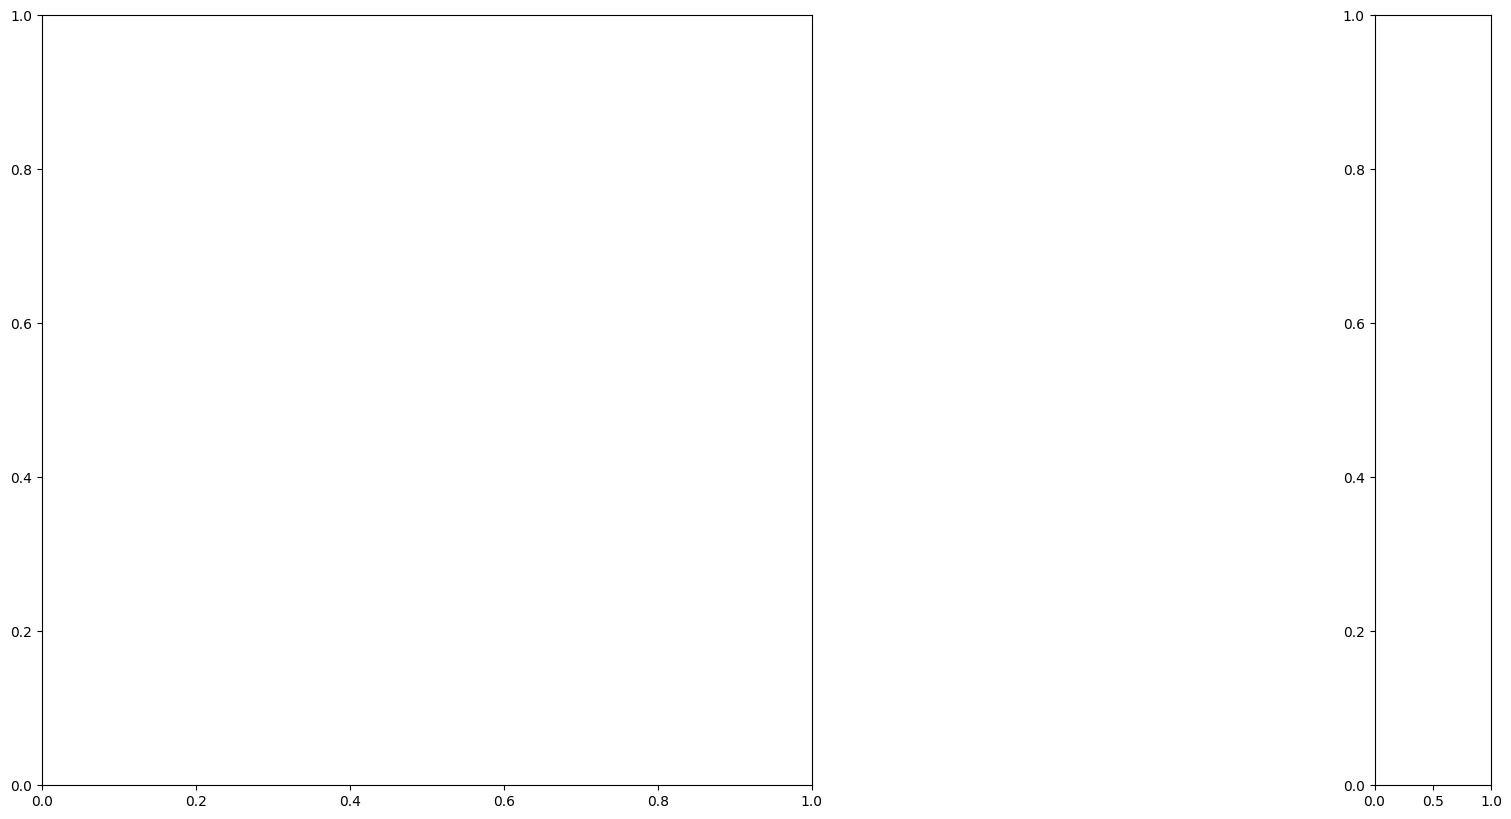

In [68]:
# Visualize the missing values
msno.matrix(train)

After merging the train datasets contains 322,047 rows and 17 columns and includes information about sales, promotions, prices, store locations, holidays, and more. Notably, the "price" column has 22,044 missing values, which will be handled properly during the data preprocessing stage.

In [69]:
# Generate summary statistics
train.describe()

,id,sales,onpromotion,price,cluster,store_nbr,transactions
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The summary offers insights into the dataset. The summary encompasses information on sales, store numbers, promotions, prices, clusters, and transactions.

The "sales" column in the dataset exhibits a mean sales value of approximately 406.38, representing the average sales amount, with a standard deviation of around 1246.88, indicating notable sales variability. Sales figures range from a minimum of 0 to a maximum of 124,717, reflecting the diversity of sales performance observed within the dataset.

Notably, the "price" column demonstrates a mean value of approximately 3.73, with a minimum of 27.96 and a maximum of 716, suggesting a wide price range. 

The "transactions" column displays a mean of approximately 1734.12, with a minimum of 54 and a maximum of 8359, indicating the variability in transaction counts over the dataset's time span, which ranges from January 1, 2013, to August 15, 2017.



In [70]:
# Get the unique years contained in the dataset
train['date'].dt.year.unique()

AttributeError: Can only use .dt accessor with datetimelike values

From the output above, The dataset contains information spanning across five consecutive years, namely 2013, 2014, 2015, 2016, and 2017. 

In [ ]:
# Decompose the date column into Year, Year-Month, Month and Day to facilitate deep analysis
# year
train['year'] = train.date.dt.year

# year-month
train['year-month'] = train['date'].apply(lambda x : x.strftime('%Y-%m'))

# month
train['month'] = train.date.dt.month

# day
train['day'] = train.date.dt.day

In [ ]:
# Confirm changes
train.head()

In [ ]:
# Check distinct month
sorted(train['month'].unique())

From the output above, it can be confirmed that, the dataset contains sales information for all the months in a year

# ANALYSIS

In [ ]:
# Define custom color palette
custom_color_palette = ["#835AF1","#37AA9C", "#B8F7D4", "#94F3E4"]

# Set the custom color palette for Plotly Express
px.defaults.color_discrete_sequence = custom_color_palette
px.defaults.color_continuous_scale = custom_color_palette

### SCATTER PLOT

In [ ]:
# Create a scatter plot using Plotly Express
fig = px.scatter(train, x='onpromotion', y='sales', labels={'onpromotion': 'Promotion', 'sales': 'Sales'})

# Update the axis labels and add a title
fig.update_layout(title='Scatter Plot of Sales vs. Promotion')
fig.show()

The scatter plot above signifies a weak position correlation between onpromotion and sales, the correlation coeffient will be calculated and feed in to further analysis.

### CORRELATION PLOT

In [ ]:
# Select the columns of interest
columns_of_interest = ['sales', 'onpromotion']

# Calculate the correlation matrix
correlation_matrix = train[columns_of_interest].corr()

# Create a heatmap using Plotly Express
fig = px.imshow(correlation_matrix, x=columns_of_interest, y=columns_of_interest)

# Update the layout
fig.update_layout(title='Correlation Heatmap between Sales and On Promotion')

# Add text annotations with white font color
annotations = []
for i, row in enumerate(columns_of_interest):
    for j, col in enumerate(columns_of_interest):
        annotations.append(
            go.layout.Annotation(
                text=f'{correlation_matrix.iloc[i, j]:.2f}',  # Format correlation to two decimal places
                x=columns_of_interest[j],
                y=columns_of_interest[i],
                showarrow=False,
                font=dict(color='white', size=16)  # Set the font color to white
            )
        )

fig.update_layout(annotations=annotations)

# Show the plot
fig.show()

The correlation coefficient calculated between the number of products under promotion (as indicated by the "onpromotion" column) and sales in supermarkets is approximately 0.42.

### STATISTICAL TEST

In [ ]:
# Extract the 'onpromotion' and 'sales' columns
onpromotion = train['onpromotion']
sales = train['sales']

# Calculate the Pearson correlation coefficient and p-value
correlation_coefficient, p_value = stats.pearsonr(onpromotion, sales)

# Define the significance level (alpha)
alpha = 0.05

# Print the results
print(f"Pearson Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

# Check if the correlation is statistically significant
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant influence of onpromotion on sales.")
else:
    print("Fail to reject the null hypothesis. There is no significant influence of onpromotion on sales.")


In conclusion, the Pearson correlation coefficient calculated between the number of products under promotion (as indicated by the "onpromotion" column) and sales in supermarkets is approximately 0.4180. The corresponding p-value obtained from the correlation analysis is very close to zero (P-value: 0.0000). Based on the results of this analysis, we reject the null hypothesis.

There is a statistically significant positive correlation (Pearson Correlation Coefficient = 0.4180) between the number of products under promotion and sales in supermarkets. This suggests that promotions have a significant influence on sales, and as the number of products under promotion increases, sales tend to increase as well.

This finding implies that supermarket managers and marketers should pay attention to their promotional strategies, as they can have a substantial impact on sales performance. By optimizing and strategically planning promotions, supermarkets can potentially boost their sales and revenue.

# QUESTION 1 

##### IS THE TRAIN DATASET COMPLETE (HAS ALL THE REQUIRED DATES)?

In [ ]:
min_date = train['date'].min()
max_date = train['date'].max()
all_dates = pd.date_range(start=min_date, end=max_date)
missing_dates = all_dates[~all_dates.isin(train['date'])]

if missing_dates.empty:
    print("The train dataset is complete for all required dates.")
else:
    print("The train dataset is not complete for all required dates. Missing dates: \n", missing_dates)

The train dataset is not complete for all required dates. There are missing dates spanning from January 2, 2013, to August 14, 2017, totaling 1509 missing dates. This means that there are gaps in the dataset, and it does not contain records for these specific dates. 

These missing dates could be of significance as the project is to analyze sales data over a continuous time period. Based on our project goals, we need to consider how to handle these gaps in the data, such as through data imputation or by excluding these missing dates from our analysis to ensure that we are working with a complete and continuous time series.

Such decision will be taken during the preprocessing stage of our analysis


# QUESTION 2

##### WHICH DATES HAVE THE LOWEST AND HIGHEST SALES FOR EACH YEAR?

In [ ]:
min_sales_dates = train.groupby('year')[['date', 'sales']].min()
max_sales_dates = train.groupby('year')[['date', 'sales']].max()

full_dates = min_sales_dates.merge(max_sales_dates, on=['year'])

full_dates.rename(columns={'date_x': 'date_min', 'sales_x': 'sales_min', 'date_y': 'date_max', 'sales_y': 'sales_max'},  inplace=True)

full_dates


For the year 2013, the date with the lowest sales was January 1st, with sales amounting to 0.0 units. Conversely, the date with the highest sales in 2013 occurred on December 31st, recording a substantial sales figure of 46,271.0 units. These findings shed light on the significant sales variation observed throughout the year, with a remarkable peak towards the end of 2013.

Moving to the year 2014, the date with the lowest sales again fell on January 1st, with sales at 0.0 units. However, there was a noteworthy increase in sales as the year progressed, with December 31st marking the highest sales day, reaching 45,361.0 units. This suggests a pattern similar to the previous year, with peak sales observed at the end of 2014.

In 2015, the trend continued with the lowest sales observed on January 1st, amounting to 0.0 units. The date of December 31st registered the highest sales for the year, totaling 33,274.0 units. This data reinforces the pattern of higher sales towards the end of the year, possibly related to holiday shopping and year-end promotions.

The year 2016 exhibited a different trend. While the date with the lowest sales remained consistent on February 8th, with 0.0 units, the date with the highest sales shifted to December 26th, recording an impressive 124,717.0 units. This significant increase in sales toward the end of the year, specifically after February, suggests a unique sales pattern for 2016.

Finally, in 2017, the date with the lowest sales continued to be on January 2nd, with 0.0 units. However, the year's highest sales occurred on August 15th, with a total of 23,966.0 units. This particular year showed a different peak sales date compared to previous years.

# QUESTION 3

##### DID THE EARTHQUAKE IMPACT SALES?

## TIME SERIES PLOT

We'll start by creating a time series plot of sales data over time, focusing on the period before and after the earthquake. This will provide a visual representation of any significant changes in sales.

In [ ]:
# Filter data for the period before and after the earthquake
pre_earthquake = train[train['date'] < '2016-04-16']
post_earthquake = train[train['date'] >= '2016-04-16']

In [ ]:
# Create a line plot for sales
fig = px.line(train, x='date', y='sales', title='Supermarket Sales Over Time')

# Earthquake date
earthquake_date = '2016-04-16'

# Add a vertical line at the date of the earthquake
fig.add_shape(
    go.layout.Shape(
        type='line',
        x0=earthquake_date,
        x1=earthquake_date,
        y0=0,
        y1=train['sales'].max(),
        line=dict(color='red', width=2, dash='dash'),
    )
)

# Show plot
fig.show()


## STATISTICAL ANALYSIS

We'll perform statistical analysis to compare sales before and after the earthquake. We will use the independent sample t-test as it compares the mean of sales before and after the earthquake

In [ ]:

# Perform a t-test to compare sales before and after the earthquake
t_stat, p_value = ttest_ind(pre_earthquake['sales'], post_earthquake['sales'])

# Significance level
alpha = 0.05

if p_value < alpha:
    print(f"The difference in sales before and after the earthquake is statistically significant (p-value = {p_value}).")
else:
    print(f"There is no statistically significant difference in sales before and after the earthquake (p-value = {p_value}).")



The time series graph displays supermarket sales over time, with a vertical dashed line indicating the date of the earthquake. Here are key observations from the graph:
- **Sales Before Earthquake (Left Side of Vertical Line)**: Sales appear to follow a relatively stable pattern before the earthquake, with some fluctuations but no major disruptions. There is a consistent trend, and sales remain within a certain range.

- **Sales After Earthquake (Right Side of Vertical Line)**: Immediately after the earthquake (to the right of the vertical line), there is a noticeable change in the sales pattern. Sales increase significantly. This indicates a sharp increase in sales following the earthquake with people buying alot of items.

- **Post-Earthquake Trend**: The trend line after the earthquake shows a upward trajectory, suggesting a high increase in sales. The sales data do return to the same stable pattern seen before the earthquake after some months.

Also, the statistical analysis performed indicates that there is a significant difference in sales before and after the earthquake. The p-value, which is extremely close to zero (5.93e-125), provides strong evidence to support this conclusion, which is that the earthquake had a significant impact on supermarket sales.

Based on these observations and the statistical analysis, we can conclude that the earthquake had a significant and not a lasting impact on supermarket sales. The sales data show a clear disruption and a change in the trend, with higher sales levels persisting over a few months after the earthquake. 

This conclusion is supported by both visual evidence from the line graph and the highly significant p-value from the statistical test.f the event.

# QUESTION 4

##### ARE CERTAIN GROUPS OF STORES SELLING MORE PRODUCTS? (CLUSTER, CITY, STATE, TYPE)

In [ ]:
# Calculate total sales for the top 5 cities, clusters, states, and store types
top_cities = train.groupby('city')['sales'].sum().sort_values(ascending=False).nlargest(5).reset_index()
top_clusters = train.groupby('cluster')['sales'].sum().sort_values(ascending=False).nlargest(5).reset_index()
top_states = train.groupby('state')['sales'].sum().sort_values(ascending=False).nlargest(5).reset_index()
top_store_types = train.groupby('store_type')['sales'].sum().sort_values(ascending=False).nlargest(5).reset_index()

# Create subplots with 2 rows and 2 columns
fig = make_subplots(rows=2, cols=2, subplot_titles=['Top Cities', 'Top Clusters', 'Top States', 'Top Store Types'])

# Add bar graphs for top cities
fig.add_trace(go.Bar(x=top_cities['city'], y=top_cities['sales'], name='Top Cities'), row=1, col=1)

# Add bar graphs for top clusters
fig.add_trace(go.Bar(x=top_clusters['cluster'], y=top_clusters['sales'], name='Top Clusters'), row=1, col=2)

# Add bar graphs for top states
fig.add_trace(go.Bar(x=top_states['state'], y=top_states['sales'], name='Top States'), row=2, col=1)

# Add bar graphs for top store types
fig.add_trace(go.Bar(x=top_store_types['store_type'], y=top_store_types['sales'], name='Top Store Types'), row=2, col=2)

# Update layout settings
fig.update_xaxes(title_text='City', row=1, col=1)
fig.update_xaxes(title_text='Cluster', row=1, col=2)
fig.update_xaxes(title_text='State', row=2, col=1)
fig.update_xaxes(title_text='Store Type', row=2, col=2)

fig.update_yaxes(title_text='Total Sales', row=1, col=1)
fig.update_yaxes(title_text='Total Sales', row=1, col=2)
fig.update_yaxes(title_text='Total Sales', row=2, col=1)
fig.update_yaxes(title_text='Total Sales', row=2, col=2)

# Update the title
fig.update_layout(title_text='Top 5 Sales by City, Cluster, State, and Store Type', height=600)

# Show the plot
fig.show()

The analysis of total sales based on different groupings reveals interesting insights into the performance of stores in various categories. 

**City Analysis**: Among the cities, Quito stands out with significantly higher total sales compared to other cities, indicating that it is the top-performing city in terms of sales. Guayaquil follows with a substantial but lower total sales figure. This suggests that Quito and Guayaquil are key revenue-generating cities for the stores.

**Cluster Analysis**: When examining sales by cluster, Cluster 14 emerges as the leader with the highest total sales, demonstrating that it is the most successful cluster in terms of revenue. Clusters 6, 8, 11, and 10 also perform well but at a slightly lower level. This analysis highlights the variation in sales performance across different clusters, with Cluster 14 notably leading the way.

**State Analysis**: In terms of states, Pichincha exhibits the highest total sales, significantly surpassing other states. Guayas follows with a substantial but lower sales figure. This suggests that stores located in Pichincha and Guayas contribute significantly to the overall sales, reflecting the regional variations in sales performance.

**Store Type Analysis**: Among the store types, Holiday stores lead in total sales, indicating that they generate the highest revenue. Event and Additional store types also perform well but at a lower level. This analysis underscores the impact of store type on sales, with Holiday stores significantly outperforming others in terms of revenue generation.

In conclusion, this analysis can guide strategic decision-making for store management, helping them focus resources and efforts on high-performing groups to further enhance sales and overall profitability.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:

reu = seasonal_decompose(train['sales'], model='additive',  period=10)

In [ ]:
reu.plot()